# Forecast Future Market Trends

In [41]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# Define the ticker and date range
ticker = 'TSLA'
start_date = '2015-01-01'
end_date = '2025-01-31'

In [49]:
# Download the data
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [50]:
# Print the shape and columns of the DataFrame to verify
print("DataFrame shape:", data.shape)
print("DataFrame columns:", data.columns)

DataFrame shape: (2535, 5)
DataFrame columns: MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])


In [51]:
tsla_close = data['Close'].copy()

In [52]:
# Print the shape and head of the selected data
print("Selected Close shape:", tsla_close.shape)  # Should output (n,) where n is the number of observations
print(tsla_close.head())


Selected Close shape: (2535, 1)
Ticker           TSLA
Date                 
2015-01-02  14.620667
2015-01-05  14.006000
2015-01-06  14.085333
2015-01-07  14.063333
2015-01-08  14.041333


In [53]:
# Fit ARIMA model (ensure it's univariate)
model = ARIMA(tsla_close, order=(5, 1, 0))  # Adjust p, d, q as needed
model_fit = model.fit()  # Fit the model

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [54]:
# Set the frequency of the index to business day
tsla_close.index = pd.date_range(start=tsla_close.index[0], periods=len(tsla_close), freq='B')


1. Forecast Future Prices

In [55]:
# Forecast for the next 12 months (252 trading days)
forecast_steps = 252
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=tsla_close.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [56]:
# Get mean predictions and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

2. Visualize the Forecast

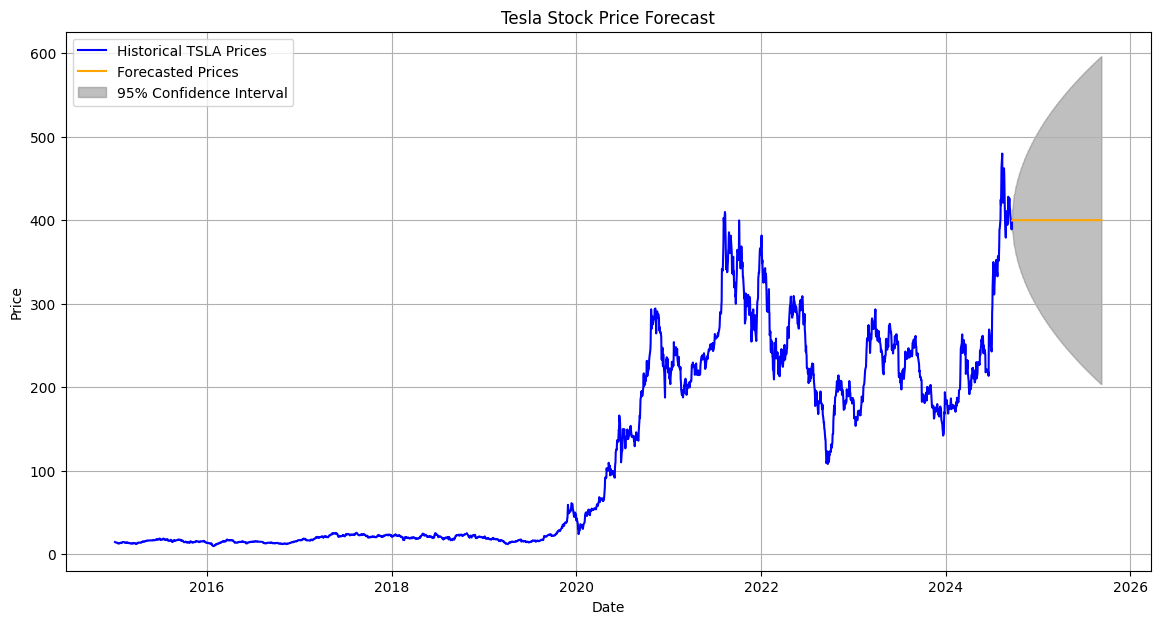

In [58]:
plt.figure(figsize=(14, 7))
plt.plot(tsla_close, label='Historical TSLA Prices', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecasted Prices', color='orange')
plt.fill_between(forecast_index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='gray', 
                 alpha=0.5, 
                 label='95% Confidence Interval')

plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()